# Data visualization projet : CarniDIET 1.0 dataset


Data set source : https://www.kaggle.com/datasets/michaelbryantds/carnivorous-diets

Project plannification : https://trello.com/b/H1LsB1I6/iron-hack-project-w4-data-visualization

## Librairies and data importation

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
import seaborn as sns
import numpy as np
import squarify #For tree map with matplot
import plotly.express as px 
import plotly.graph_objects as go #Interface plus bas niveau que ploty.express

In [61]:
data = pd.read_csv("data/carnivorous_diet.csv", encoding = "ISO-8859-1")
metadata_df = pd.read_excel("data/metadata.xlsx")

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_16077/170039792.py:1: DtypeWarning:

Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.



## 1 - Dataset presentation
Data on the diet compositions for 103 species of terrestrial, carnivorous mammals. The data is comming from (mostly) peer-reviewed scientific papers. Each of its 29,000+ rows represents a “diet record,” describing a component of the species’ consumption, for a particular population, geography, and study.
<br/>
This dataset was originaly published with a scientific article in "Global ecology and biogeography" peer-review journal (https://doi.org/10.1111/geb.13296).




## 2 - Number of diet records per specie

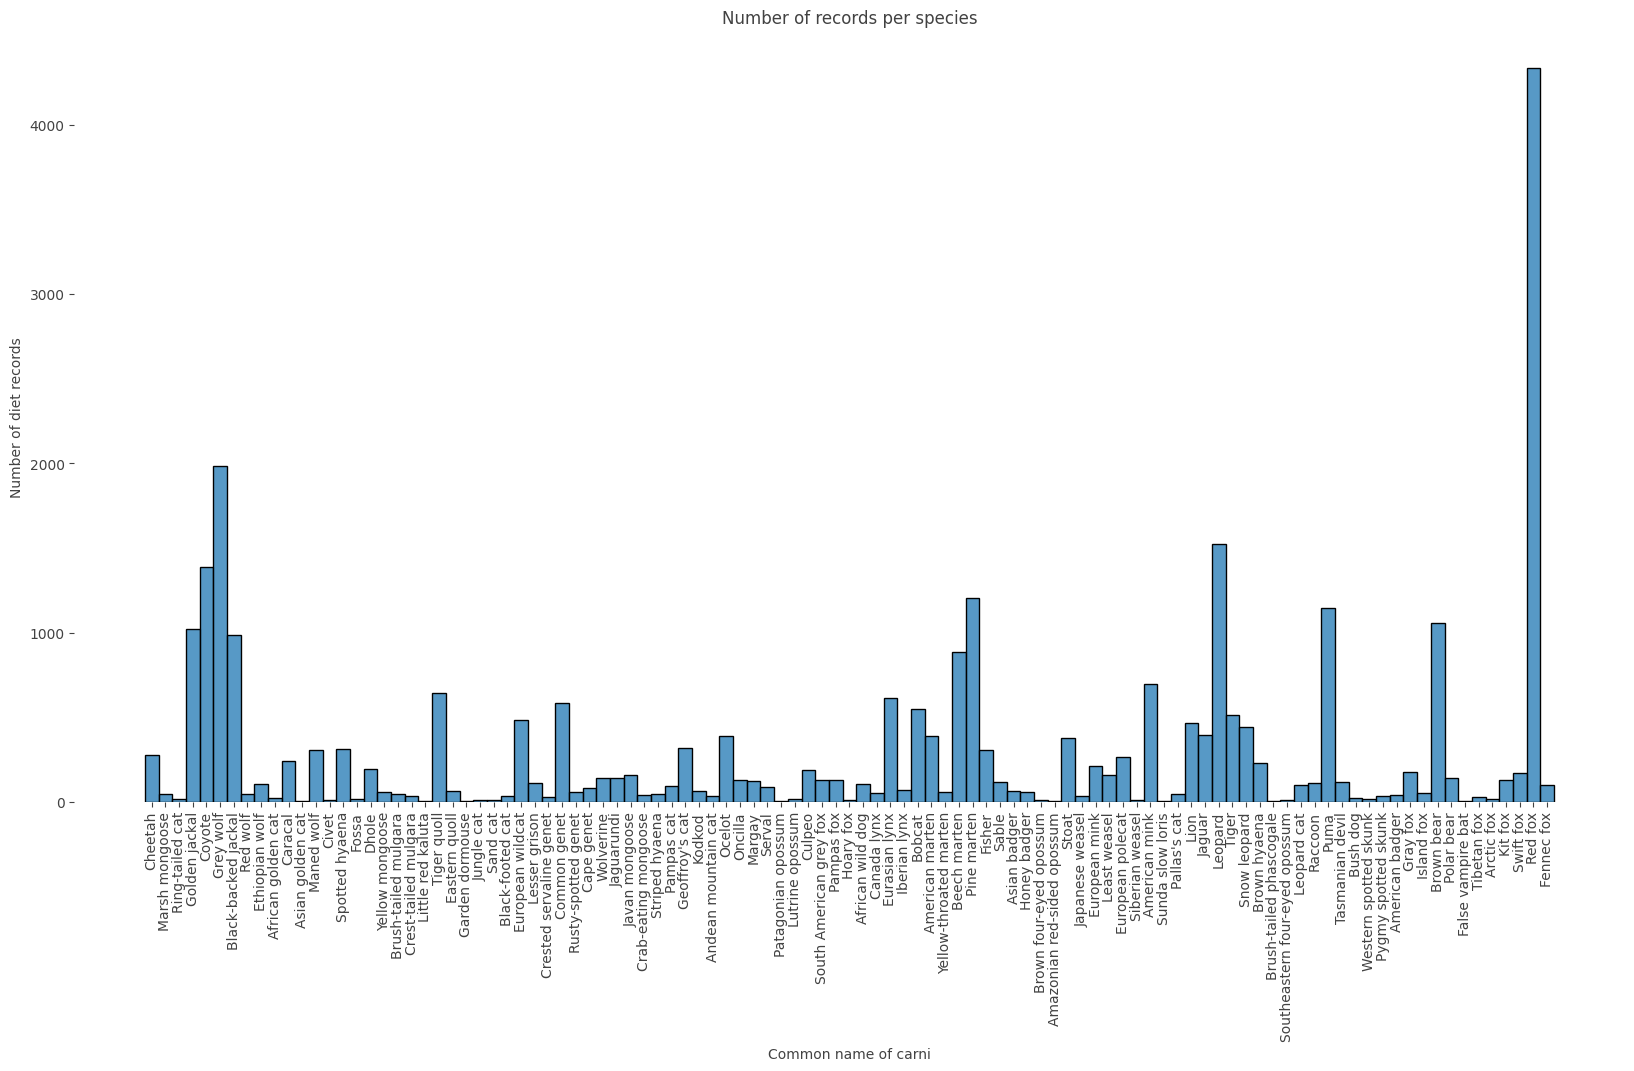

In [62]:
fig = plt.figure(figsize=(20,10))
p = sns.histplot(data["commonNameCarni"]) #histplot() n'est pas le bon choix car ne permet pas d'ordonnée par le nombre de "Diet records" (pas d'argument "order") -> countplot(), barplot()

plt.xticks(rotation=90)
p.set(xlabel="Common name of carni", ylabel = "Number of diet records", title="Number of records per species")
# p.tick_params(length=0)                               # remove tick liens

#Remove box arount plot 
p.spines['top'].set_visible(False) #p est un subplot de fig
p.spines['bottom'].set_visible(False) #p est un subplot de fig
p.spines['left'].set_visible(False) #p est un subplot de fig
p.spines['right'].set_visible(False)

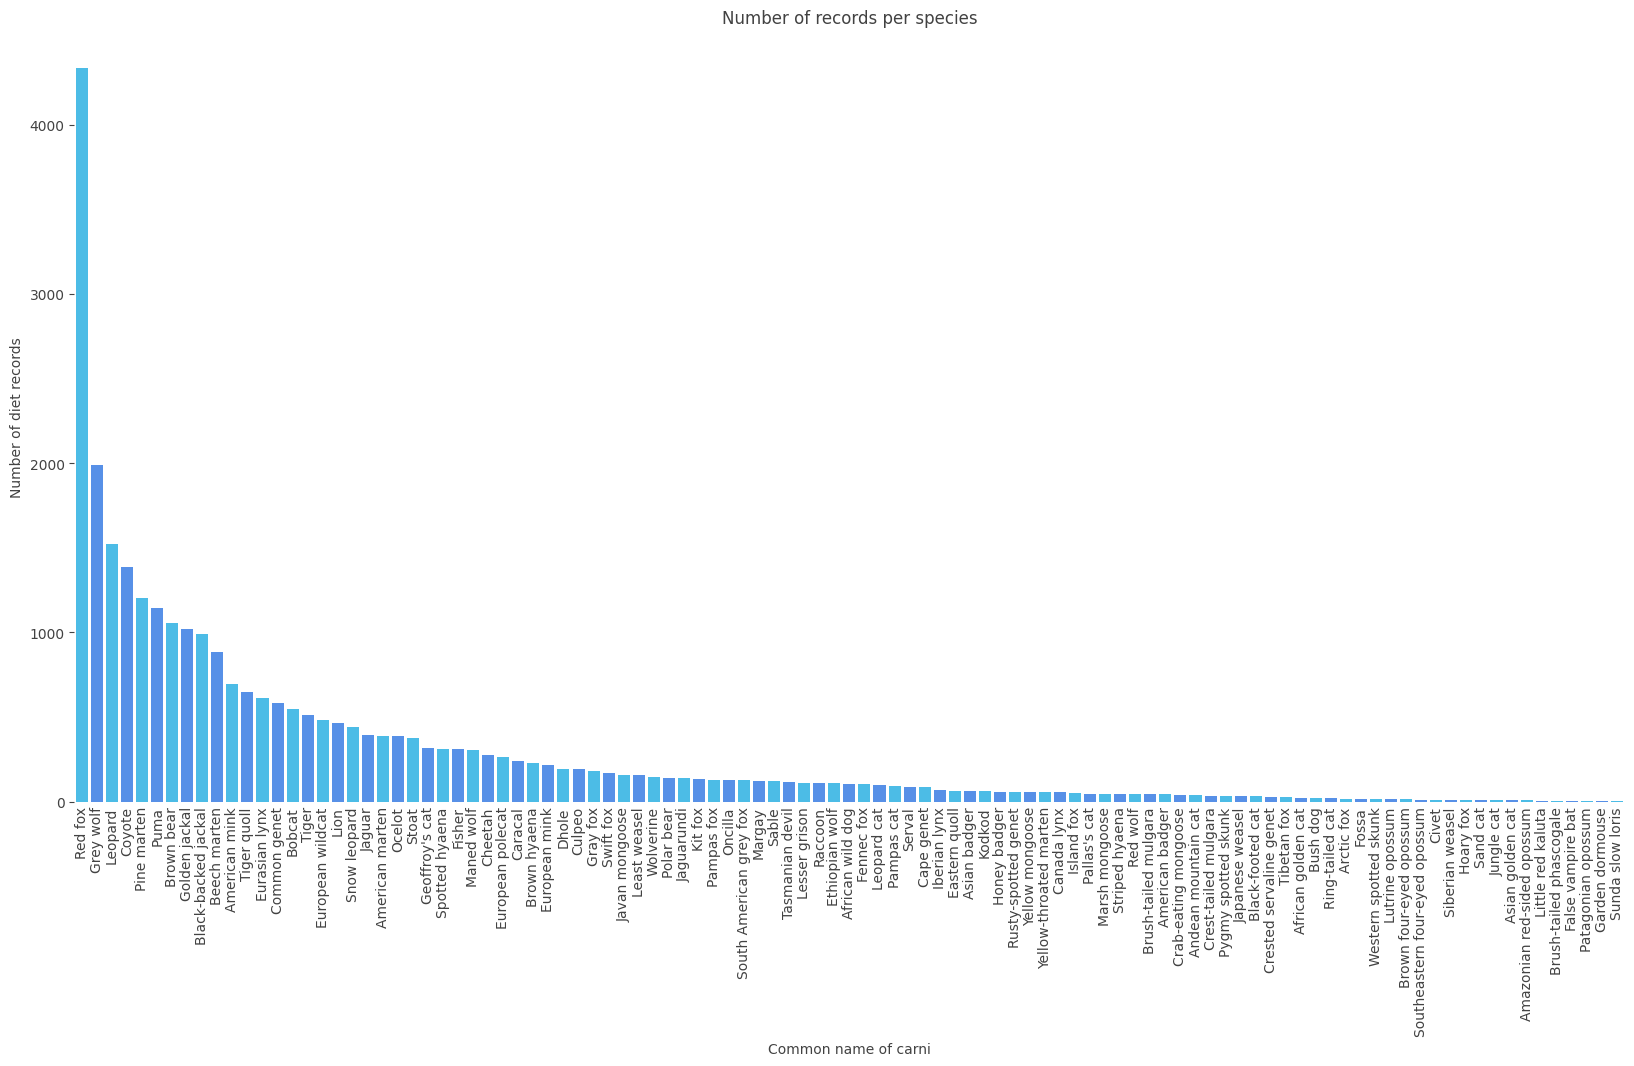

In [63]:
fig = plt.figure(figsize=(20,10))
p = sns.countplot(data=data, x = "commonNameCarni", order = data["commonNameCarni"].value_counts().index, palette=['#33C7FF',"#3F8BFF"])

p.set(xlabel="Common name of carni", ylabel = "Number of diet records", title="Number of records per species")
#Remove box arount plot 
p.spines['top'].set_visible(False) #p est un subplot de fig
p.spines['bottom'].set_visible(False) #p est un subplot de fig
p.spines['left'].set_visible(False) #p est un subplot de fig
p.spines['right'].set_visible(False)
plt.xticks(rotation=90)
p.tick_params(axis="x", length = 0) # Remove xticks

#### Pas claire, il faut trouver un moyen d'afficher les donnée en résumant d'avantage les valeurs -> grouper : combien d'espèce ont entre tant et tant de records ?<br/>
https://stackoverflow.com/questions/73214214/how-can-i-create-a-bar-chart-with-ranges-of-values

In [64]:
# Create a dataset with range values

diet_record_num = data["commonNameCarni"].value_counts()
diet_record_num # -> compter combien sont dans quelle tranche de valeurs

cut = pd.cut(diet_record_num,[0,100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,4500], labels=["0-100","100-200","200-300","300-400","400-500","500-600","600-700","700-800","800-900","900-1000","1000-1500","1500-2000","2000-2500","2500-3000","3000-3500","3500-4000","4000-4500"])
cut = cut.to_frame()
cut["Names"] = cut.index

cut

count                    Names
commonNameCarni                                            
Red fox                  4000-4500                  Red fox
Grey wolf                1500-2000                Grey wolf
Leopard                  1500-2000                  Leopard
Coyote                   1000-1500                   Coyote
Pine marten              1000-1500              Pine marten
...                            ...                      ...
Brush-tailed phascogale      0-100  Brush-tailed phascogale
False vampire bat            0-100        False vampire bat
Patagonian opossum           0-100       Patagonian opossum
Garden dormouse              0-100          Garden dormouse
Sunda slow loris             0-100         Sunda slow loris

[103 rows x 2 columns]

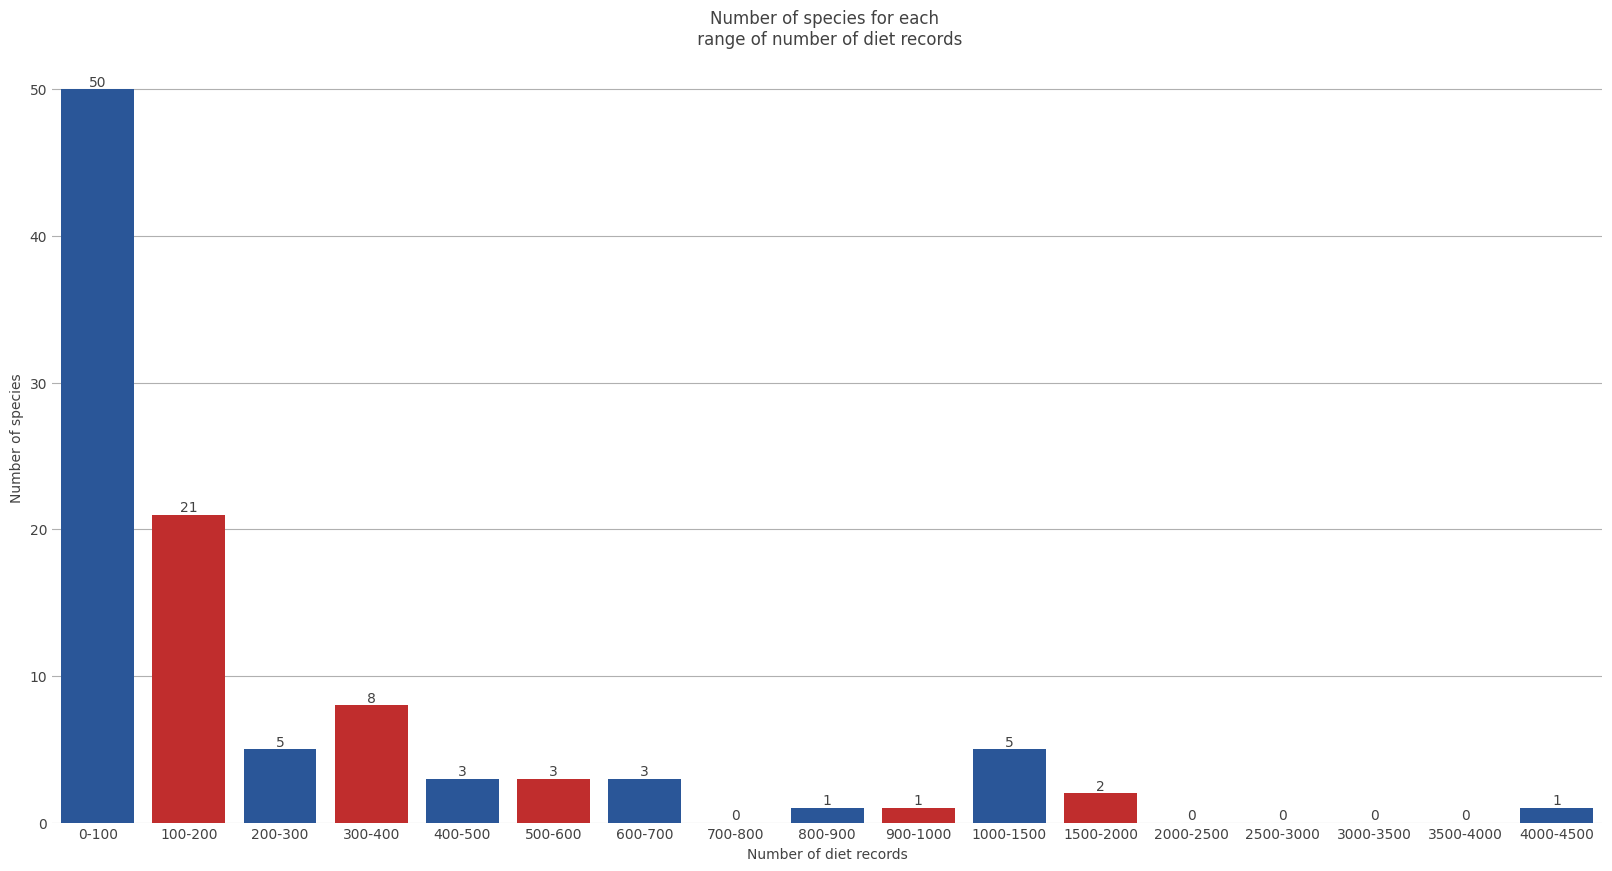

In [65]:
fig = plt.figure(figsize=(20,10))
ax = sns.countplot(cut, x = "count", palette=['#1852AA',"#D81515"])

ax.set(xlabel="Number of diet records", ylabel = "Number of species", title="Number of species for each \n range of number of diet records")
#Remove box arount plot 
ax.spines['top'].set_visible(False) #p est un subplot de fig
ax.spines['bottom'].set_visible(False) #p est un subplot de fig
ax.spines['left'].set_visible(False) #p est un subplot de fig
ax.spines['right'].set_visible(False)
ax.tick_params(length = 0) # Remove xticks
ax.set_axisbelow(True)
ax.grid(axis = 'y')
ax.bar_label(ax.containers[0])

my_color = '#424242'
mpl.rcParams['text.color'] = my_color
mpl.rcParams['axes.labelcolor'] = my_color
mpl.rcParams['xtick.color'] = my_color
mpl.rcParams['ytick.color'] = my_color

## 3 - Repartition of species in order and family

In [66]:
# Actuellement on compte le nombre de records, pas le nombre d'espèces par catégorie (on compte le ligne mais pas unique)


data_plot = data[["orderCarni","familyCarni","scientificNameCarni"]]
data_plot['orderCarni_count'] = data_plot.groupby(['orderCarni'])['orderCarni'].transform('count') 
data_plot['familyCarni_count'] = data_plot.groupby(['orderCarni', 'familyCarni'])['familyCarni'].transform('count')
data_plot['scientificNameCarni_count'] = data_plot.groupby(['orderCarni', 'familyCarni', 'scientificNameCarni'])['scientificNameCarni'].transform('count') # Number of records per spaces
data_plot = data_plot.drop_duplicates(subset="scientificNameCarni") # On a bien 103 ligne

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_16077/2669004827.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_16077/2669004827.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wm/d5dlldtd761c3pdx78hpgpg40000gn/T/ipykernel_16077/2669004827.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [67]:
data_plot.groupby(['orderCarni'])['orderCarni']

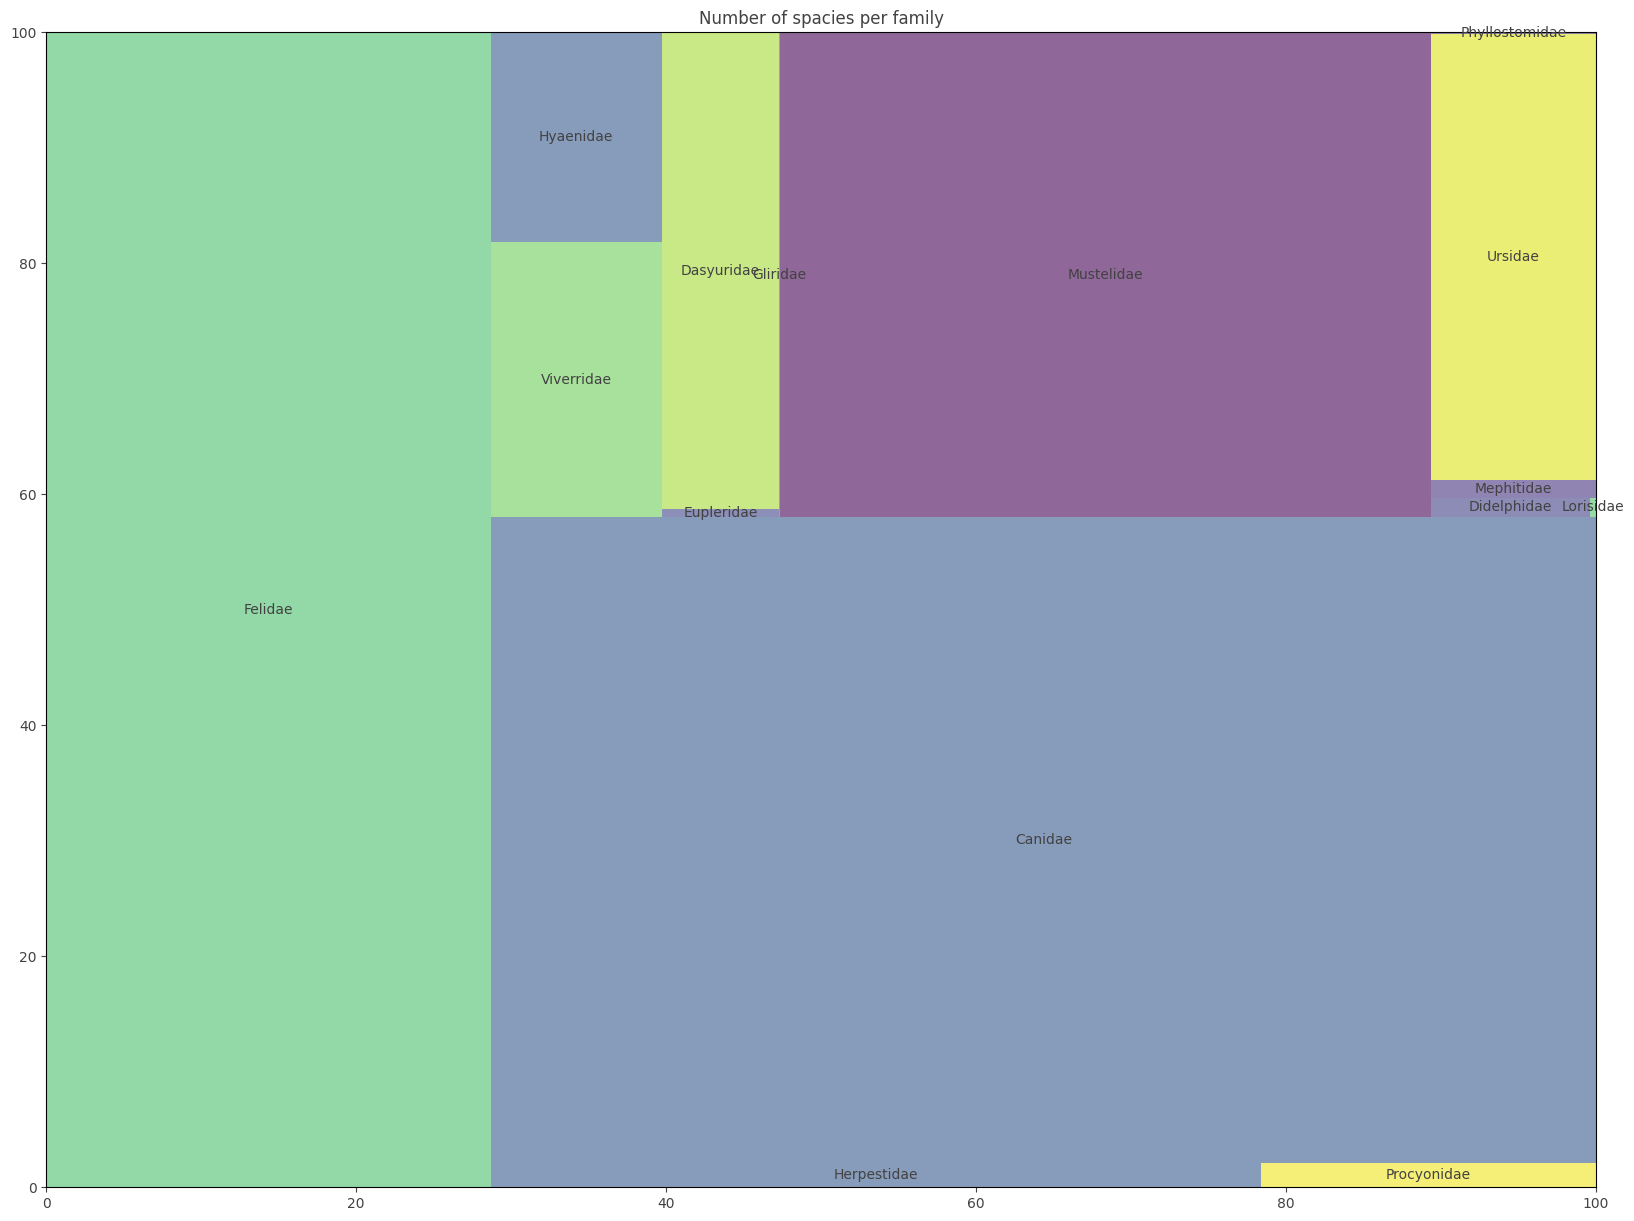

In [68]:
list_of_orders = list(data_plot["familyCarni"].unique())
num_spaces_per_order = list(data_plot["familyCarni_count"].unique())

fig = plt.figure(figsize=(20,15))
squarify.plot(sizes=num_spaces_per_order, label=list_of_orders, alpha = 0.6).set(title="Number of spacies per family")
plt.show()

For Treemap, matplotlib is very limitated (for multilevel treemap and label placement), it's preferable to use ploty (https://plotly.com/python/treemaps/)

In [69]:
fig = px.treemap(data_plot, path=['familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count')
# fig = px.treemap(data_plot, path=['orderCarni', 'familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [70]:
fig = px.sunburst(data_plot, path=['familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count', width=800,height=800)
# fig = px.sunburst(data_plot, path=['orderCarni','familyCarni', 'scientificNameCarni'], values='scientificNameCarni_count', width=800,height=800)
fig.show()

## 4 - Geographical repartition of diet records

### Mapping libraries

**Geopandas** (Pandas extended to support geographical data and algorithms -> NOT a visualization librairy)

Critère de choix : besoin d'interactovité ou pas ? 

Based on matplotlib (https://matplotlib.org/mpl-third-party/) : 
- **Cartopy**
- **EOmaps** (A library to create interactive maps of geographical datasets)
- **Geoplot** (High-level Python geospatial plotting library based on Cartopy.)

Non based on matplotlib (plus puissante, surement trop pour notre utilisation, et pas basés sur matplotlib -> on va utiliser autre choses) : 
- **Folium** (https://geopandas.org/en/stable/gallery/plotting_with_folium.html)
- **Plotly** (https://plotly.com/python/mapbox-layers/)

In [71]:
fig = px.scatter_mapbox(data, lat="decimalLatitude", lon="decimalLongitude", hover_name="commonNameCarni", hover_data=["commonNamePrey","startYear","endYear"],zoom=2, height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [80]:
families_list = data["familyCarni"].unique()
color_list = ['#CCCCCC', '#DDDDDD', '#EFEFEF', '#F0F0F0', '#FAFAFA']

trace = go.Scattermapbox()
layout = go.Layout(height=1000, mapbox_zoom=1.5, mapbox_center=dict(lat=48.8566, lon=2.3522), mapbox_style="open-street-map", margin={"r": 0, "t": 0, "l": 0, "b": 0},geo=dict(projection_type='mollweide'))
fig = go.Figure(data= trace, layout=layout)

for family in families_list :
    curr_data = data[data["familyCarni"] == family]
    lat = curr_data["decimalLatitude"]
    lon = curr_data["decimalLongitude"]
    fig.add_trace(go.Scattermapbox(lat=lat, lon=lon, name=family))

fig.show()